# SET 1

1. write a program to do the following:

  a. read an img

  b. get img info

  c. find compression ratio for the copied img

  d. display negative of an img


2. write a program for histogram plotting of an img

3. write a program to perform histogram equalization

4. write a program for performing local histogram equalization

5. develop a program for the following img enhancement operations:

  a. brightness enhancement

  b. contrast enhancement

  c. complement of an image

  d. bi-level or binary contrast enhancement

  e. brightness slicing

  f. low-pass filtering

  g. high-pass filtering


6. develop programs for the following geometrical transformations on an img:

  a. translation

  b. rotation

  c. scaling

  d. skewing

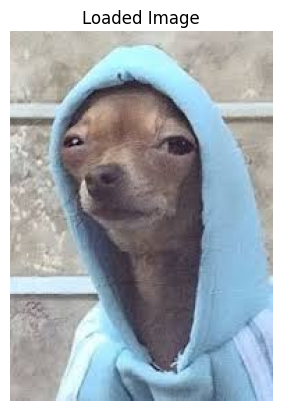

Image Information:
Dimensions (Height, Width, Channels): (266, 189, 3)
Data Type: uint8
Size in bytes: 150822


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/dog.png'
img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Loaded Image')
plt.axis('off')
plt.show()

print("Image Information:")
print(f"Dimensions (Height, Width, Channels): {img.shape}")
print(f"Data Type: {img.dtype}")
print(f"Size in bytes: {img.nbytes}")


Theoretical Uncompressed Size: 150822 bytes
Actual Size (in memory for dummy image): 150822 bytes
Compression Ratio: 1.00


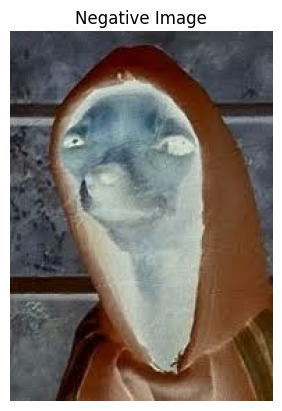

In [14]:
import os

height, width = img.shape[:2]
channels = img.shape[2] if len(img.shape) > 2 else 1
bytes_per_pixel = img.dtype.itemsize
theoretical_size = height * width * channels * bytes_per_pixel

actual_size = img.nbytes

compression_ratio = theoretical_size / actual_size if actual_size > 0 else 0

print(f"\nTheoretical Uncompressed Size: {theoretical_size} bytes")
print(f"Actual Size (in memory for dummy image): {actual_size} bytes")
print(f"Compression Ratio: {compression_ratio:.2f}")

if img.dtype == np.uint8:
    max_pixel_value = 255
elif img.dtype == np.uint16:
    max_pixel_value = 65535
else:
    max_pixel_value = np.iinfo(img.dtype).max

negative_img = max_pixel_value - img

plt.figure()
plt.imshow(cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB) if len(negative_img.shape) > 2 else negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

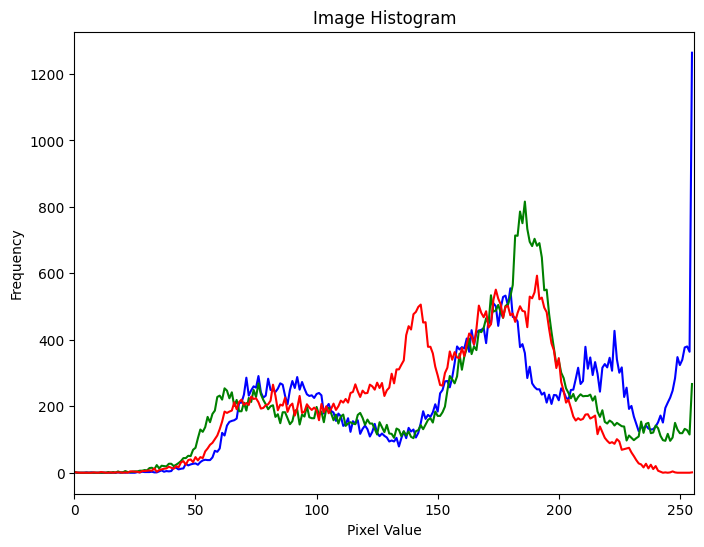

In [15]:
if len(img.shape) == 3:
    color = ('b','g','r')
    plt.figure(figsize=(8, 6))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
else:
    histr = cv2.calcHist([img],[0],None,[256],[0,256])
    plt.figure(figsize=(8, 6))
    plt.plot(histr)

plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.show()

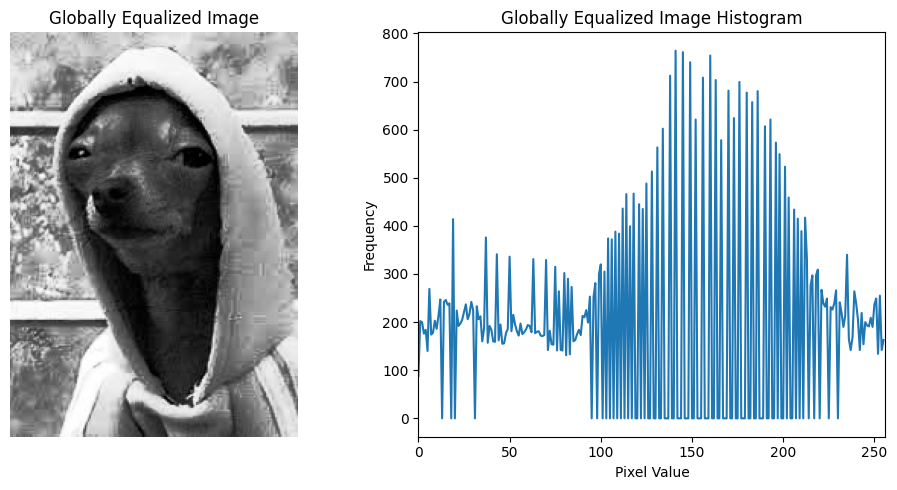

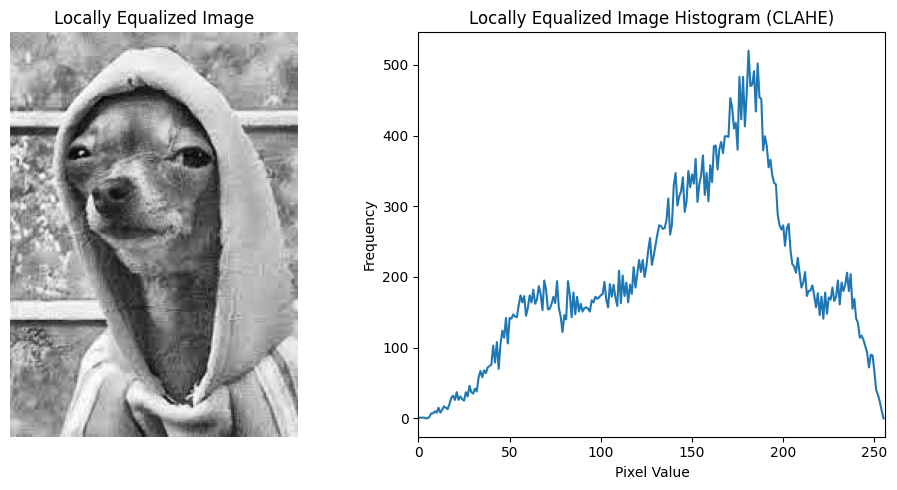

In [18]:
if len(img.shape) == 3:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = img

global_equalized_img = cv2.equalizeHist(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(global_equalized_img, cmap='gray')
plt.title('Globally Equalized Image')
plt.axis('off')

global_hist = cv2.calcHist([global_equalized_img], [0], None, [256], [0, 256])
plt.subplot(1, 2, 2)
plt.plot(global_hist)
plt.title('Globally Equalized Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_equalized_img = clahe.apply(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(local_equalized_img, cmap='gray')
plt.title('Locally Equalized Image')
plt.axis('off')

local_hist = cv2.calcHist([local_equalized_img], [0], None, [256], [0, 256])
plt.subplot(1, 2, 2)
plt.plot(local_hist)
plt.title('Locally Equalized Image Histogram (CLAHE)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

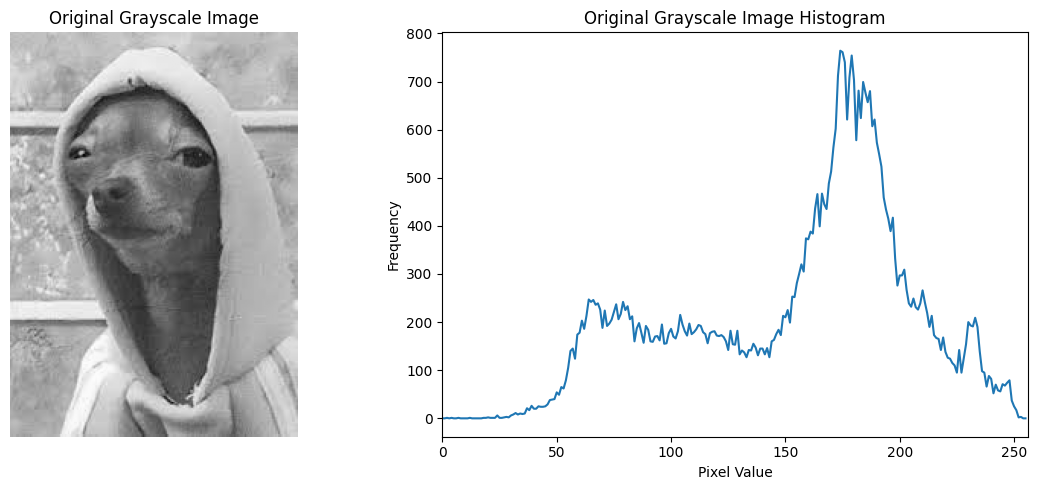

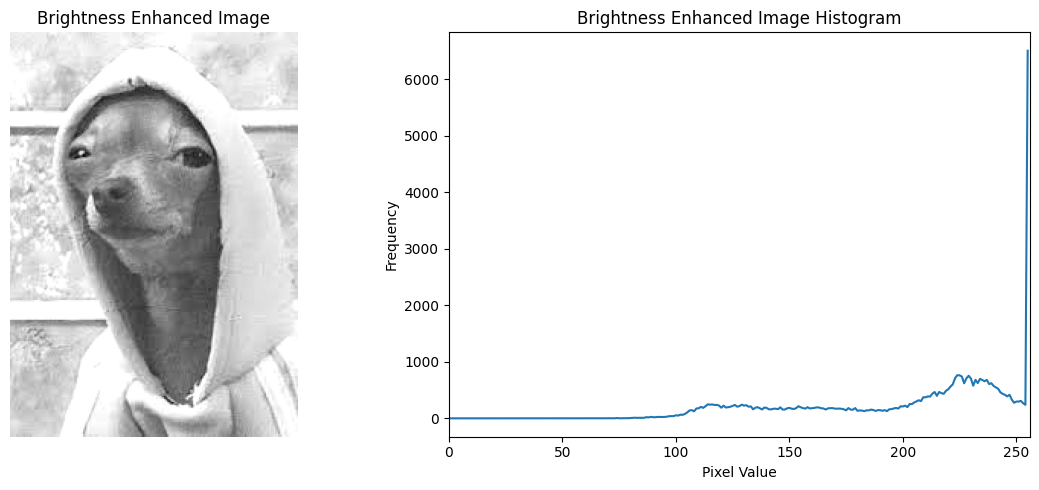

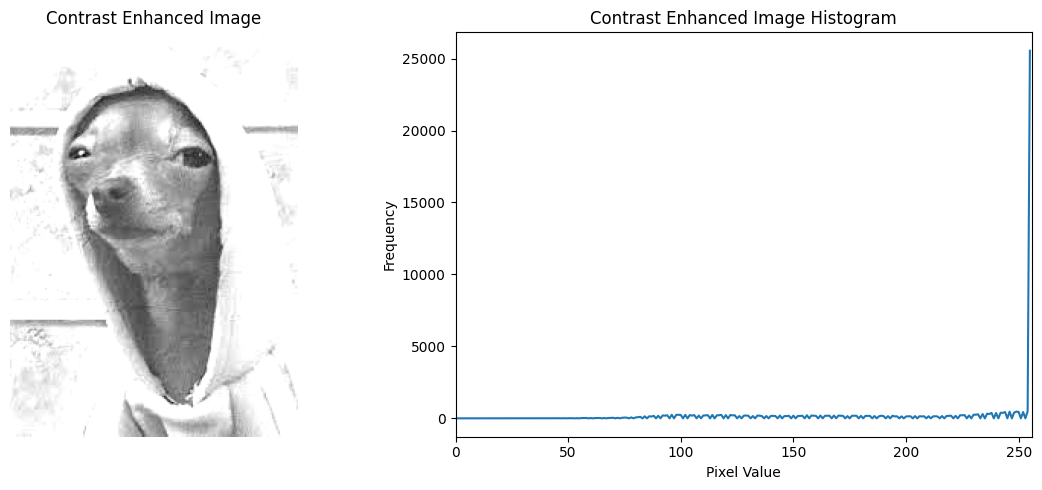

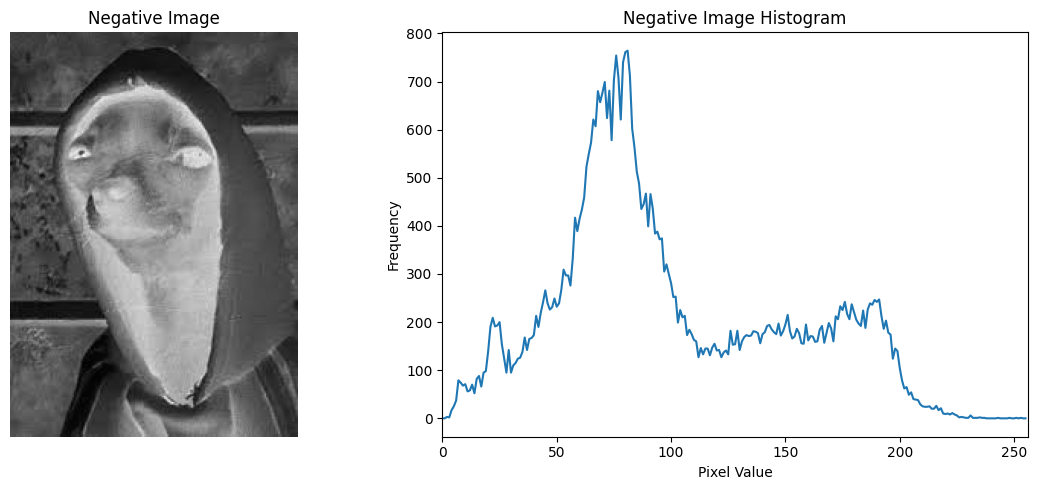

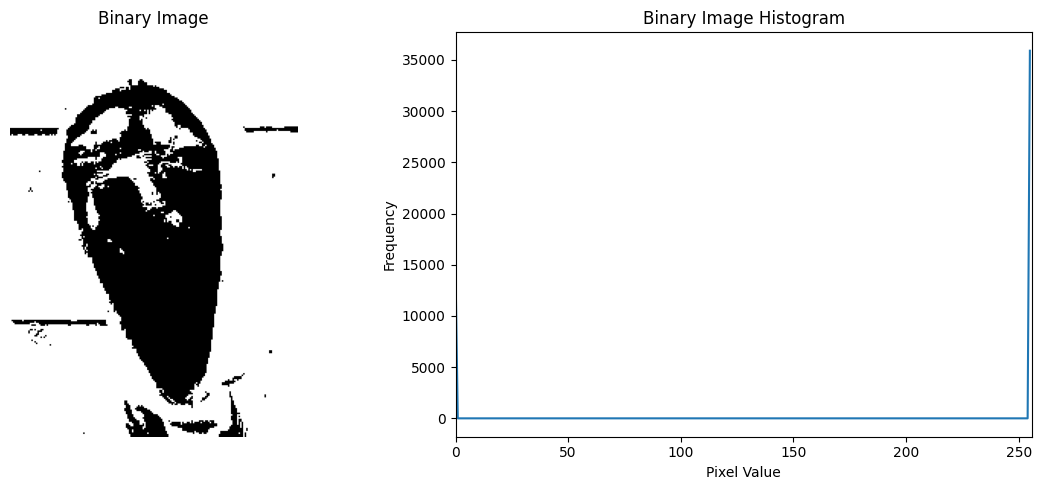

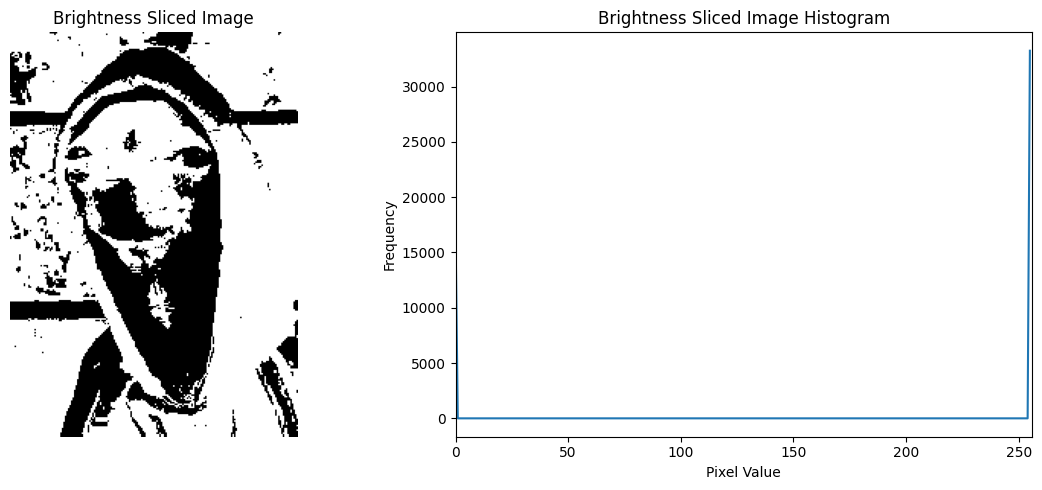

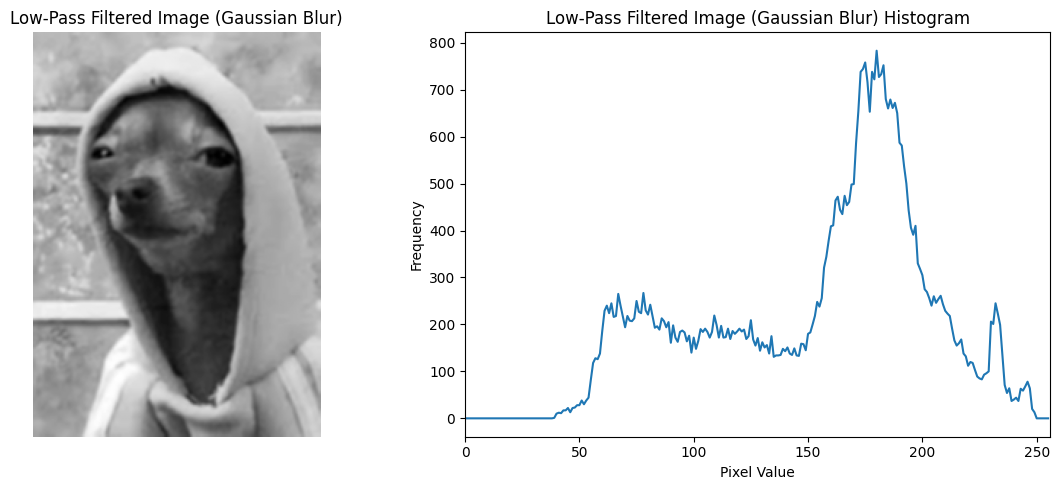

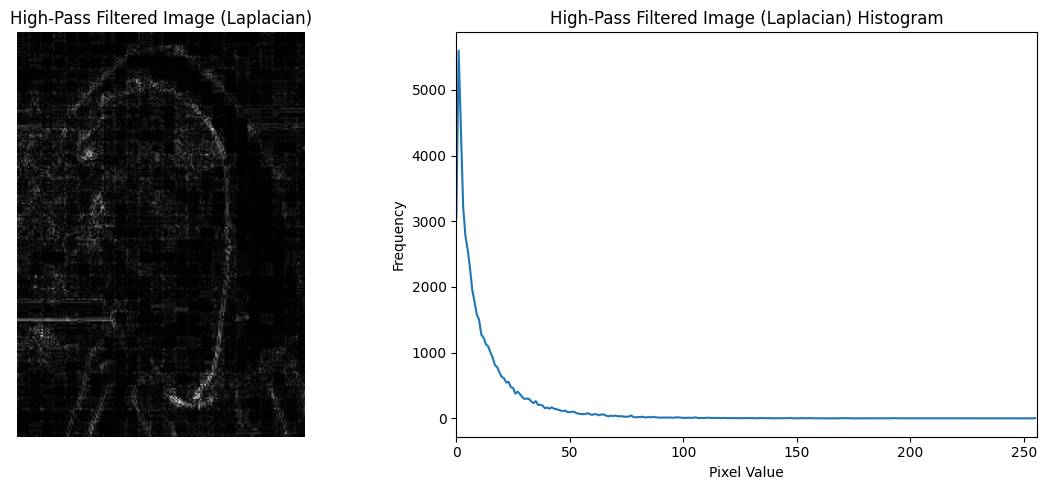

In [19]:
if len(img.shape) == 3:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = img

def plot_image_and_histogram(image, title, cmap='gray'):
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f'{title} Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

plt.figure(figsize=(12, 5))
plot_image_and_histogram(gray_img, 'Original Grayscale Image')
plt.tight_layout()
plt.show()

alpha_brightness = 1.0
beta_brightness = 50
brightness_img = cv2.convertScaleAbs(gray_img, alpha=alpha_brightness, beta=beta_brightness)

plt.figure(figsize=(12, 5))
plot_image_and_histogram(brightness_img, 'Brightness Enhanced Image')
plt.tight_layout()
plt.show()

alpha_contrast = 1.5
beta_contrast = 0
contrast_img = cv2.convertScaleAbs(gray_img, alpha=alpha_contrast, beta=beta_contrast)

plt.figure(figsize=(12, 5))
plot_image_and_histogram(contrast_img, 'Contrast Enhanced Image')
plt.tight_layout()
plt.show()

negative_img = 255 - gray_img

plt.figure(figsize=(12, 5))
plot_image_and_histogram(negative_img, 'Negative Image')
plt.tight_layout()
plt.show()

threshold_value = 127
max_binary_value = 255
_, binary_img = cv2.threshold(gray_img, threshold_value, max_binary_value, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))
plot_image_and_histogram(binary_img, 'Binary Image')
plt.tight_layout()
plt.show()

lower_bound = 100
upper_bound = 200
highlight_value = 255
background_value = 0

brightness_sliced_img = np.full_like(gray_img, background_value)
brightness_sliced_img[(gray_img >= lower_bound) & (gray_img <= upper_bound)] = highlight_value

plt.figure(figsize=(12, 5))
plot_image_and_histogram(brightness_sliced_img, 'Brightness Sliced Image')
plt.tight_layout()
plt.show()

kernel_size = (5, 5)
low_pass_img = cv2.GaussianBlur(gray_img, kernel_size, 0)

plt.figure(figsize=(12, 5))
plot_image_and_histogram(low_pass_img, 'Low-Pass Filtered Image (Gaussian Blur)')
plt.tight_layout()
plt.show()

laplacian = cv2.Laplacian(gray_img, cv2.CV_64F)
high_pass_img = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(12, 5))
plot_image_and_histogram(high_pass_img, 'High-Pass Filtered Image (Laplacian)')
plt.tight_layout()
plt.show()

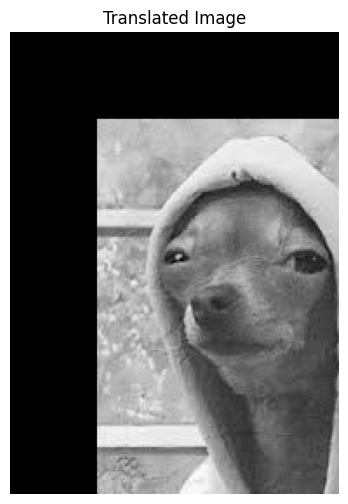

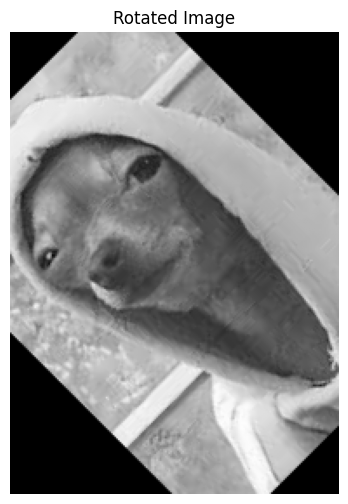

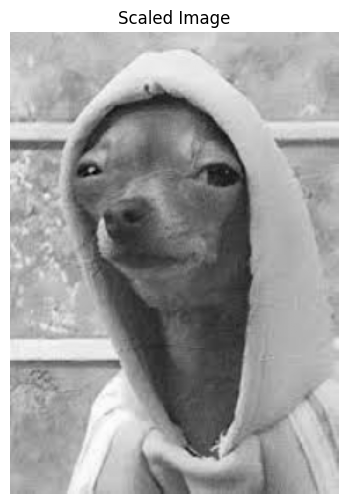

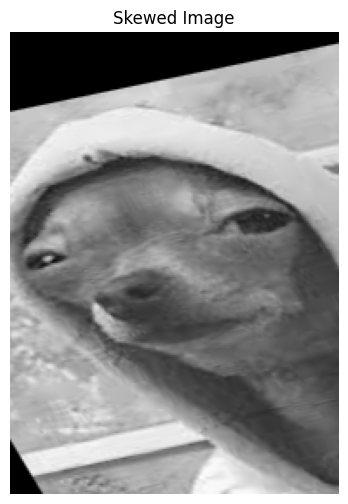

In [20]:
if len(img.shape) == 3:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = img

height, width = gray_img.shape[:2]

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_img = cv2.warpAffine(gray_img, translation_matrix, (width, height))

plt.figure(figsize=(6, 6))
plt.imshow(translated_img, cmap='gray')
plt.title('Translated Image')
plt.axis('off')
plt.show()

angle = 45
center = (width // 2, height // 2)
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(gray_img, rotation_matrix, (width, height))

plt.figure(figsize=(6, 6))
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')
plt.show()

fx, fy = 1.5, 1.5
scaled_img = cv2.resize(gray_img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(6, 6))
plt.imshow(scaled_img, cmap='gray')
plt.title('Scaled Image')
plt.axis('off')
plt.show()

pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [250, 50], [100, 250]])

skew_matrix = cv2.getAffineTransform(pts1, pts2)

skewed_img = cv2.warpAffine(gray_img, skew_matrix, (width, height))

plt.figure(figsize=(6, 6))
plt.imshow(skewed_img, cmap='gray')
plt.title('Skewed Image')
plt.axis('off')
plt.show()